## UML Project : Data checks for clustering

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Importing data : top 1000 english books from Comic genre, ranked on ratings

books = pd.read_csv("./data/top_1000_books.csv")
interactions = pd.read_csv("./data/top_1000_books_interactions.csv")
reviews = pd.read_csv("./data/top_1000_books_reviews.csv")

In [3]:
#Checking the data import

In [4]:
books.head()

,Unnamed: 0,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,31264,1401207928,3400,['631559'],US,eng,"[{'count': '42534', 'name': 'to-read'}, {'coun...",NaN,False,4.25,...,11.0,NaN,2005.0,https://www.goodreads.com/book/show/5805.V_for...,https://images.gr-assets.com/books/1343668985m...,5805,212464,392838,V for Vendetta,V for Vendetta
1,7453,394541553,4402,['186595'],US,eng,"[{'count': '92915', 'name': 'to-read'}, {'coun...",NaN,False,4.35,...,11.0,NaN,1991.0,https://www.goodreads.com/book/show/15196.Maus_I,https://images.gr-assets.com/books/1327884972m...,15196,189288,1947012,Maus I: A Survivor's Tale: My Father Bleeds Hi...,Maus I: A Survivor's Tale: My Father Bleeds Hi...
2,469,1401207529,1790,"['482441', '300099', '194163', '636672']",US,eng,"[{'count': '7924', 'name': 'to-read'}, {'count...",NaN,False,4.22,...,NaN,NaN,2005.0,https://www.goodreads.com/book/show/59980.Batman,https://images.gr-assets.com/books/1327940389m...,59980,154013,2501570,Batman: Year One,Batman: Year One
3,49402,1421501686,2399,['205782'],US,eng,"[{'count': '9727', 'name': 'to-read'}, {'count...",NaN,False,4.42,...,10.0,NaN,2005.0,https://www.goodreads.com/book/show/13615.Deat...,https://images.gr-assets.com/books/1419952134m...,13615,142755,1782155,"Death Note, Vol. 1: Boredom (Death Note, #1)","Death Note, Vol. 1: Boredom (Death Note, #1)"
4,3495,1607066017,8700,['736247'],US,eng,"[{'count': '78762', 'name': 'to-read'}, {'coun...",NaN,False,4.24,...,10.0,NaN,2012.0,https://www.goodreads.com/book/show/15704307-s...,https://images.gr-assets.com/books/1486028947m...,15704307,142640,19113524,"Saga, Vol. 1 (Saga, #1)","Saga, Vol. 1 (Saga, #1)"


In [5]:
interactions.head()

,Unnamed: 0,book_id,Unnamed: 0.1,user_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,0,5805,69,06316bec7a49286f1f98d5acce24f923,94fb3ec3a16941c3deaf5b45d9df32c5,True,2,NaN,Mon Jun 04 19:15:00 -0700 2012,Mon Jun 04 19:15:00 -0700 2012,NaN,NaN
1,1,5805,524,0b9a0d35734107c5df4a1e3787193afb,cd3c9f155cebe80e88a7a9c411c24360,True,3,NaN,Sun Dec 09 16:14:38 -0800 2012,Mon Jul 14 08:38:20 -0700 2014,Wed Apr 10 08:14:47 -0700 2013,NaN
2,2,5805,619,8489357f2f485c1a961d4cbdc54ea84b,d25d8656ccf1824f12c212e7d99bd153,False,0,NaN,Sun Jul 29 12:00:06 -0700 2012,Sun Jul 29 12:00:06 -0700 2012,NaN,NaN
3,3,5805,630,5d99e945d98169c37484b38244ac444b,5e5b70ece9ff47b73a12bd9c2461fcc8,False,0,NaN,Mon Jun 04 22:12:25 -0700 2012,Mon Jun 04 22:12:25 -0700 2012,NaN,NaN
4,4,5805,727,26b5bed05bcabbabdaec4ee08fc43244,64956c237056a385a30ce71978484001,True,4,NaN,Mon Jun 04 22:36:29 -0700 2012,Mon Jun 04 22:36:29 -0700 2012,NaN,NaN


In [6]:
reviews.head()

,Unnamed: 0,book_id,user_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,0,5805,6baf45d03466a5858403d892286ff222,8d680b828c9b260423f5740e67b03291,4,Could use less misogyny and stockholm syndrome.,Thu Apr 21 11:27:06 -0700 2016,Thu Apr 21 11:27:36 -0700 2016,Thu Apr 21 11:27:36 -0700 2016,NaN,0,0
1,1,5805,76413aa32ae6debd29ff7c2c437f17ca,80a09e6153378edbe685b640b1b957f0,4,I love the artwork. I love the ideas that V re...,Tue Nov 18 09:14:16 -0800 2014,Sun Dec 21 16:14:29 -0800 2014,Sun Dec 21 00:00:00 -0800 2014,Tue Nov 18 00:00:00 -0800 2014,0,0
2,2,5805,c001efe2d798df0bbac0ba51dbed1f9b,65715d42615cf1ca8c7151bd25a22544,3,interesting graphic novel. Interesting created...,Sun Sep 07 12:35:48 -0700 2008,Sun Sep 07 12:39:38 -0700 2008,Sun Sep 07 00:00:00 -0700 2008,NaN,0,0
3,3,5805,2d43e0a1f7e9c0946fdf7f71fddbf7a8,d55a8c7950191477cf62cc76677bbf19,2,"Honestly, I was really disappointed by this. O...",Sun Jun 10 11:07:52 -0700 2012,Sat Jan 30 11:14:07 -0800 2016,Sat Jan 01 00:00:00 -0800 2011,NaN,0,0
4,4,5805,d6804aa6e3a96b8e1104b8b9ac3fe882,77ad3c07806bb88c5a1bfa46b9357b20,3,"I enjoyed this book---and the idea of a ""Robin...",Sat Jan 09 18:46:54 -0800 2010,Sun Jan 17 18:24:13 -0800 2010,Sat Jan 16 00:00:00 -0800 2010,NaN,0,0


In [7]:
#Checking column names

In [8]:
books.columns

Index(['Unnamed: 0', 'isbn', 'text_reviews_count', 'series', 'country_code',
       'language_code', 'popular_shelves', 'asin', 'is_ebook',
       'average_rating', 'kindle_asin', 'similar_books', 'description',
       'format', 'link', 'authors', 'publisher', 'num_pages',
       'publication_day', 'isbn13', 'publication_month', 'edition_information',
       'publication_year', 'url', 'image_url', 'book_id', 'ratings_count',
       'work_id', 'title', 'title_without_series'],
      dtype='object')

In [9]:
interactions.columns

Index(['Unnamed: 0', 'book_id', 'Unnamed: 0.1', 'user_id', 'review_id',
       'is_read', 'rating', 'review_text_incomplete', 'date_added',
       'date_updated', 'read_at', 'started_at'],
      dtype='object')

In [10]:
reviews.columns

Index(['Unnamed: 0', 'book_id', 'user_id', 'review_id', 'rating',
       'review_text', 'date_added', 'date_updated', 'read_at', 'started_at',
       'n_votes', 'n_comments'],
      dtype='object')

In [11]:
#Checking the total rows and columns in the data

In [12]:
books.shape

(1000, 30)

In [13]:
interactions.shape

(2396877, 12)

In [14]:
reviews.shape

(146970, 12)

In [15]:
#Checking column data types

In [16]:
books.dtypes

Unnamed: 0                int64
isbn                     object
text_reviews_count        int64
series                   object
country_code             object
language_code            object
popular_shelves          object
asin                     object
is_ebook                   bool
average_rating          float64
kindle_asin              object
similar_books            object
description              object
format                   object
link                     object
authors                  object
publisher                object
num_pages               float64
publication_day         float64
isbn13                   object
publication_month       float64
edition_information      object
publication_year        float64
url                      object
image_url                object
book_id                   int64
ratings_count             int64
work_id                   int64
title                    object
title_without_series     object
dtype: object

In [17]:
interactions.dtypes

Unnamed: 0                 int64
book_id                    int64
Unnamed: 0.1               int64
user_id                   object
review_id                 object
is_read                     bool
rating                     int64
review_text_incomplete    object
date_added                object
date_updated              object
read_at                   object
started_at                object
dtype: object

In [18]:
reviews.dtypes

Unnamed: 0       int64
book_id          int64
user_id         object
review_id       object
rating           int64
review_text     object
date_added      object
date_updated    object
read_at         object
started_at      object
n_votes          int64
n_comments       int64
dtype: object

In [19]:
#Checking data summary and checking for outliers

books.describe()

,Unnamed: 0,text_reviews_count,average_rating,num_pages,publication_day,publication_month,publication_year,book_id,ratings_count,work_id
count,1000.000000,1000.000000,1000.000000,911.000000,874.000000,896.000000,908.000000,1.000000e+03,1000.000000,1.000000e+03
mean,44960.825000,536.297000,4.200910,196.994512,11.556064,6.674107,2007.275330,6.123915e+06,14437.599000,9.836872e+06
std,25605.261751,841.084323,0.230944,119.973518,9.446525,3.260880,6.115857,7.989765e+06,20321.057719,1.320003e+07
min,166.000000,25.000000,3.200000,24.000000,1.000000,1.000000,1974.000000,8.660000e+02,4196.000000,7.970000e+02
25%,23077.000000,115.750000,4.060000,144.000000,3.000000,4.000000,2005.000000,1.330178e+05,5615.500000,7.291252e+05
50%,46660.500000,257.000000,4.210000,191.000000,9.000000,7.000000,2008.000000,1.386229e+06,7946.000000,2.569915e+06
75%,67248.250000,575.750000,4.360000,208.000000,19.000000,9.000000,2012.000000,1.029330e+07,14033.750000,1.614749e+07
max,89398.000000,9098.000000,4.820000,1440.000000,31.000000,12.000000,2017.000000,3.249757e+07,212464.000000,5.309002e+07


In [20]:
reviews.describe()

,Unnamed: 0,book_id,rating,n_votes,n_comments
count,146970.000000,1.469700e+05,146970.000000,146970.000000,146970.000000
mean,73484.500000,1.104313e+07,3.970994,1.122243,0.187031
std,42426.728869,9.693730e+06,1.099062,7.596347,1.415764
min,0.000000,8.660000e+02,0.000000,-2.000000,-1.000000
25%,36742.250000,2.488710e+05,3.000000,0.000000,0.000000
50%,73484.500000,1.008811e+07,4.000000,0.000000,0.000000
75%,110226.750000,1.935104e+07,5.000000,1.000000,0.000000
max,146969.000000,3.249757e+07,5.000000,806.000000,121.000000


**The minimum value of n_votes and n_comments is negative.

In [21]:
interactions.describe()

,Unnamed: 0,book_id,Unnamed: 0.1,rating
count,2.396877e+06,2.396877e+06,2.396877e+06,2.396877e+06
mean,1.198438e+06,7.108368e+06,3.767019e+06,2.649616e+00
std,6.919189e+05,8.950455e+06,2.170317e+06,2.128187e+00
min,0.000000e+00,8.660000e+02,0.000000e+00,0.000000e+00
25%,5.992190e+05,7.129200e+04,1.882588e+06,0.000000e+00
50%,1.198438e+06,1.111811e+06,3.773139e+06,4.000000e+00
75%,1.797657e+06,1.353225e+07,5.675562e+06,5.000000e+00
max,2.396876e+06,3.249757e+07,7.347629e+06,5.000000e+00


In [22]:
#Checking the level of data

In [23]:
i = books.groupby("book_id")['book_id'].count()
j = i.to_frame().rename(columns = {'book_id':'count'})
j.reset_index(inplace=True)
j.groupby('count').count()

,book_id
count,
1,1000


In [24]:
i = interactions.groupby("review_id")['review_id'].count()
j = i.to_frame().rename(columns = {'review_id':'count'})
j.reset_index(inplace=True)
j.groupby('count').count()

,review_id
count,
1,2396877


In [25]:
i = reviews.groupby("review_id")['review_id'].count()
j = i.to_frame().rename(columns = {'review_id':'count'})
j.reset_index(inplace=True)
j.groupby('count').count()

,review_id
count,
1,146970


In [26]:
#Checking the values in 'similar_books' column for books

books['similar_books'].head()

0    ['22421', '59966', '22409', '79426', '25102', ...
1    ['9517', '39916', '229823', '548934', '2248795...
2    ['106069', '3316474', '10889279', '1309276', '...
3    ['868', '228067', '271265', '6867952', '200958...
4    ['17277800', '23012877', '21329', '16164271', ...
Name: similar_books, dtype: object

In [53]:
#Checking unique authors 

books['authors'].unique()

array(["[{'author_id': '3961', 'role': ''}, {'author_id': '3960', 'role': 'Illustrator'}]",
       "[{'author_id': '5117', 'role': ''}]",
       "[{'author_id': '15085', 'role': ''}, {'author_id': '28995', 'role': 'Illustrator'}, {'author_id': '821898', 'role': 'Colorist'}, {'author_id': '28710', 'role': 'Introduction'}]",
       "[{'author_id': '5502079', 'role': ''}, {'author_id': '15577045', 'role': 'Illustrator'}]",
       "[{'author_id': '24514', 'role': 'Writer'}, {'author_id': '304633', 'role': 'Artist'}]",
       "[{'author_id': '15085', 'role': ''}, {'author_id': '12740', 'role': 'Illustrator'}, {'author_id': '29578', 'role': 'Illustrator'}]",
       "[{'author_id': '16807', 'role': 'Writer, Artist'}]",
       "[{'author_id': '1221698', 'role': ''}, {'author_id': '13359', 'role': 'Illustrator'}, {'author_id': '7271', 'role': 'Illustrator'}, {'author_id': '52930', 'role': 'Illustrator'}, {'author_id': '321799', 'role': 'Letterer'}, {'author_id': '4323624', 'role': 'Introduction

In [27]:
#Checking the values in format column for books

books['format'].unique()

array(['Hardcover', 'Paperback', nan, 'Kindle Edition', 'Comic Book',
       'Slipcased Hardcover', 'ebook', 'Library Binding', 'Comic'],
      dtype=object)

In [28]:
#Checking types of country_code

books['country_code'].unique()

array(['US'], dtype=object)

In [29]:
#Checking if reviews data a subset of interactions data

interactions_read = interactions[interactions['is_read'] == True]

interactions_read.shape

(1588897, 12)

The reviews data is not a subset of the interactions data based on the 'is_read' column

In [32]:
#Checking the values of maximum and minimum date_updated column in reviews data and interactions data

#Reviews data
reviews['date_updated'] = reviews['date_updated'].astype('str')

In [33]:
reviews['date_num_updated'] = reviews['date_updated'].str.slice(start = 8, stop = 10)
reviews['month_updated'] = reviews['date_updated'].str.slice(start = 4, stop = 7)
reviews['year_updated'] = reviews['date_updated'].str.slice(start = 26, stop = 30)

In [34]:
reviews['date_updated_exact'] = reviews['year_updated'] + " " + reviews['month_updated'] + " " + reviews['date_num_updated']

In [35]:
reviews['date_updated_exact'] = pd.to_datetime(reviews['date_updated_exact'], format = "%Y %b %d")

In [36]:
reviews['date_updated_exact'].head()

0   2016-04-21
1   2014-12-21
2   2008-09-07
3   2016-01-30
4   2010-01-17
Name: date_updated_exact, dtype: datetime64[ns]

In [37]:
reviews['date_updated_exact'].min()

Timestamp('2007-03-09 00:00:00')

In [38]:
reviews['date_updated_exact'].max()

Timestamp('2017-11-05 00:00:00')

In [39]:
#Interactions data
interactions['date_updated'] = interactions['date_updated'].astype('str')

In [40]:
interactions['date_num_updated'] = interactions['date_updated'].str.slice(start = 8, stop = 10)
interactions['month_updated'] = interactions['date_updated'].str.slice(start = 4, stop = 7)
interactions['year_updated'] = interactions['date_updated'].str.slice(start = 26, stop = 30)

In [41]:
interactions['date_updated_exact'] = interactions['year_updated'] + " " + interactions['month_updated'] + " " + interactions['date_num_updated']

In [42]:
interactions['date_updated_exact'] = pd.to_datetime(interactions['date_updated_exact'], format = "%Y %b %d")

In [43]:
interactions['date_updated_exact'].head()

0   2012-06-04
1   2014-07-14
2   2012-07-29
3   2012-06-04
4   2012-06-04
Name: date_updated_exact, dtype: datetime64[ns]

In [44]:
interactions['date_updated_exact'].min()

Timestamp('2006-12-30 00:00:00')

In [45]:
interactions['date_updated_exact'].max()

Timestamp('2017-11-05 00:00:00')

In [46]:
#Subsetting interactions data without 2016, as it is an extra year as compared to reviews data; Filtering for books read

inte_sub = interactions[(interactions['year_updated'] != '2016') & (interactions['is_read'] != False)]

In [47]:
#Merging reiews data and subsetted interactions data to see if they match

reader_inter =  pd.merge(reviews[['review_id']], inte_sub, how = "inner", on = ["review_id"])

In [48]:
reader_inter.shape

(112731, 16)

In [49]:
#Getting review data columns in interactions data 

interactions = interactions.drop(['review_text_incomplete', 'Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
interactions_rev =  pd.merge(interactions, reviews[['review_id', 'n_votes', 'n_comments']], how = "left", on = ['review_id'])

In [50]:
interactions_rev.head()

,book_id,user_id,review_id,is_read,rating,date_added,date_updated,read_at,started_at,date_num_updated,month_updated,year_updated,date_updated_exact,n_votes,n_comments
0,5805,06316bec7a49286f1f98d5acce24f923,94fb3ec3a16941c3deaf5b45d9df32c5,True,2,Mon Jun 04 19:15:00 -0700 2012,Mon Jun 04 19:15:00 -0700 2012,NaN,NaN,04,Jun,2012,2012-06-04,NaN,NaN
1,5805,0b9a0d35734107c5df4a1e3787193afb,cd3c9f155cebe80e88a7a9c411c24360,True,3,Sun Dec 09 16:14:38 -0800 2012,Mon Jul 14 08:38:20 -0700 2014,Wed Apr 10 08:14:47 -0700 2013,NaN,14,Jul,2014,2014-07-14,NaN,NaN
2,5805,8489357f2f485c1a961d4cbdc54ea84b,d25d8656ccf1824f12c212e7d99bd153,False,0,Sun Jul 29 12:00:06 -0700 2012,Sun Jul 29 12:00:06 -0700 2012,NaN,NaN,29,Jul,2012,2012-07-29,NaN,NaN
3,5805,5d99e945d98169c37484b38244ac444b,5e5b70ece9ff47b73a12bd9c2461fcc8,False,0,Mon Jun 04 22:12:25 -0700 2012,Mon Jun 04 22:12:25 -0700 2012,NaN,NaN,04,Jun,2012,2012-06-04,NaN,NaN
4,5805,26b5bed05bcabbabdaec4ee08fc43244,64956c237056a385a30ce71978484001,True,4,Mon Jun 04 22:36:29 -0700 2012,Mon Jun 04 22:36:29 -0700 2012,NaN,NaN,04,Jun,2012,2012-06-04,NaN,NaN


In [51]:
interactions_read = interactions_rev[interactions_rev['is_read'] == True]

In [52]:
interactions_read.shape

(1588897, 15)

### EDA

##### Segment : Readers with similar reading habits

In [54]:
reviews_b =  pd.merge(interactions_read, books, how="left", on=["book_id"])

In [55]:
reviews_b.head()

,book_id,user_id,review_id,is_read,rating,date_added,date_updated,read_at,started_at,date_num_updated,...,isbn13,publication_month,edition_information,publication_year,url,image_url,ratings_count,work_id,title,title_without_series
0,5805,06316bec7a49286f1f98d5acce24f923,94fb3ec3a16941c3deaf5b45d9df32c5,True,2,Mon Jun 04 19:15:00 -0700 2012,Mon Jun 04 19:15:00 -0700 2012,NaN,NaN,04,...,9.7814E+12,11.0,NaN,2005.0,https://www.goodreads.com/book/show/5805.V_for...,https://images.gr-assets.com/books/1343668985m...,212464,392838,V for Vendetta,V for Vendetta
1,5805,0b9a0d35734107c5df4a1e3787193afb,cd3c9f155cebe80e88a7a9c411c24360,True,3,Sun Dec 09 16:14:38 -0800 2012,Mon Jul 14 08:38:20 -0700 2014,Wed Apr 10 08:14:47 -0700 2013,NaN,14,...,9.7814E+12,11.0,NaN,2005.0,https://www.goodreads.com/book/show/5805.V_for...,https://images.gr-assets.com/books/1343668985m...,212464,392838,V for Vendetta,V for Vendetta
2,5805,26b5bed05bcabbabdaec4ee08fc43244,64956c237056a385a30ce71978484001,True,4,Mon Jun 04 22:36:29 -0700 2012,Mon Jun 04 22:36:29 -0700 2012,NaN,NaN,04,...,9.7814E+12,11.0,NaN,2005.0,https://www.goodreads.com/book/show/5805.V_for...,https://images.gr-assets.com/books/1343668985m...,212464,392838,V for Vendetta,V for Vendetta
3,5805,faa322d2624b0e7eb3064e39dac4af9c,be878322d4145c25bf2018e5ce3b692e,True,4,Tue Mar 18 16:24:07 -0700 2008,Tue Mar 18 16:24:07 -0700 2008,NaN,NaN,18,...,9.7814E+12,11.0,NaN,2005.0,https://www.goodreads.com/book/show/5805.V_for...,https://images.gr-assets.com/books/1343668985m...,212464,392838,V for Vendetta,V for Vendetta
4,5805,ac66a7e4003e36fb1c360e0b375e9d07,089f053ca85dd539d37a7c97d00e1c82,True,4,Tue Jun 05 03:00:26 -0700 2012,Tue Jun 05 03:00:26 -0700 2012,NaN,NaN,05,...,9.7814E+12,11.0,NaN,2005.0,https://www.goodreads.com/book/show/5805.V_for...,https://images.gr-assets.com/books/1343668985m...,212464,392838,V for Vendetta,V for Vendetta


In [56]:
form_readers = reviews_b[['format', 'user_id']].drop_duplicates(['format', 'user_id'])
form_readers_count = form_readers.groupby(['format']).count()

In [57]:
form_readers_count

,user_id
format,
Comic,943
Comic Book,1659
Hardcover,105509
Kindle Edition,9547
Library Binding,553
Paperback,141509
Slipcased Hardcover,2049
ebook,3758


Text(0, 0.5, 'no of readers')

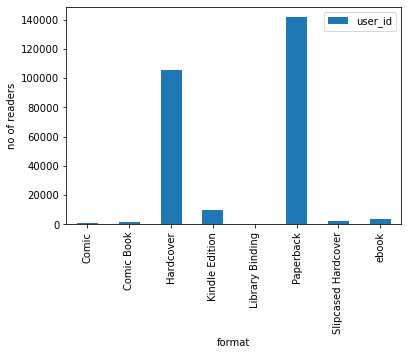

In [58]:
ax = form_readers_count.plot.bar(rot = 90)
ax.set_ylabel("no of readers")

In [59]:
books_for = books[['format', 'book_id']].groupby('format').count()

In [60]:
books_for

,book_id
format,
Comic,1
Comic Book,2
Hardcover,185
Kindle Edition,3
Library Binding,1
Paperback,688
Slipcased Hardcover,3
ebook,4


In [61]:
form_pg = books.groupby("format")['num_pages'].mean()

In [62]:
form_pg

format
Comic                   32.000000
Comic Book              33.000000
Hardcover              222.965714
Kindle Edition         190.000000
Library Binding        186.000000
Paperback              188.130564
Slipcased Hardcover    612.000000
ebook                  224.000000
Name: num_pages, dtype: float64

Text(0, 0.5, 'no of book pages on average')

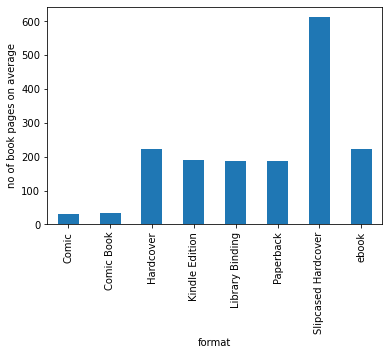

In [63]:
ax = form_pg.plot.bar(rot = 90)
ax.set_ylabel("no of book pages on average")

##### Segment : Readers who use the reviews of the book as a criterion to decide on reading the book

In [64]:
reviews_b_rating = reviews_b[['user_id', 'book_id', 'average_rating']].drop_duplicates(['user_id', 'book_id'])
form_readers_count = reviews_b_rating.groupby(['user_id'])['average_rating'].mean()

In [65]:
form_readers_count = form_readers_count.to_frame()

In [66]:
form_readers_count.reset_index(inplace=True)

In [67]:
conditions = [
    (form_readers_count['average_rating'] >= 3) & (form_readers_count['average_rating'] < 4),
    (form_readers_count['average_rating'] >= 4) & (form_readers_count['average_rating'] < 5)
     ]

In [68]:
form_readers_count['average_rating'].max()

4.82

In [69]:
values = ['3 - 4', '4 - 5']

In [70]:
form_readers_count['average_rating'] = np.select(conditions, values)

In [71]:
form_readers_c = form_readers_count.groupby("average_rating")['user_id'].count()

Text(0.5, 0, 'Book ratings')

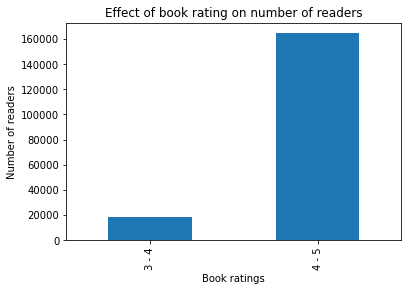

In [72]:
ax = form_readers_c.plot.bar(rot = 90)
ax.set_title("Effect of book rating on number of readers")
ax.set_ylabel("Number of readers")
ax.set_xlabel("Book ratings")

Average book ratings column is skewed.

In [83]:
review_b_1 = reviews_b[['user_id', 'book_id', 'text_reviews_count']].drop_duplicates(['user_id', 'book_id'])
review_b_2 = review_b_1.groupby(['book_id', 'text_reviews_count'])['user_id'].count()

In [84]:
review_b_3 = review_b_2.to_frame()

In [85]:
review_b_3.reset_index(inplace=True)

In [86]:
review_b_3['text_reviews_count'].min()

25

In [106]:
review_b_3_fil = review_b_3[review_b_3['text_reviews_count'] <= 100]

In [107]:
conditions = [
    (review_b_3_fil['text_reviews_count'] > 20) & (review_b_3_fil['text_reviews_count'] <= 30),
    (review_b_3_fil['text_reviews_count'] > 30) & (review_b_3_fil['text_reviews_count'] <= 40),
    (review_b_3_fil['text_reviews_count'] > 40) & (review_b_3_fil['text_reviews_count'] <= 50),
    (review_b_3_fil['text_reviews_count'] > 50) & (review_b_3_fil['text_reviews_count'] <= 100)
    ]

In [108]:
values = ['20-30', '30-40', '40-50', '50-100']

In [109]:
review_b_3_fil['reviews_range'] = np.select(conditions, values)

<ipython-input-109-14709e80b72d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_b_3_fil['reviews_range'] = np.select(conditions, values)


In [110]:
review_b_4 = review_b_3_fil.groupby("reviews_range")['user_id'].sum()

In [111]:
review_b_4 = review_b_4.to_frame()

Text(0.5, 0, 'Number of book reviews')

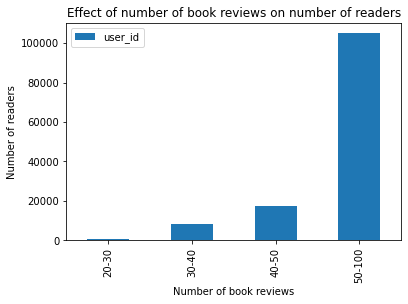

In [112]:
ax = review_b_4.plot.bar(rot = 90)
ax.set_title("Effect of number of book reviews on number of readers")
ax.set_ylabel("Number of readers")
ax.set_xlabel("Number of book reviews")

##### Segement : Readers whose reviews are usually found helpful and are active users

In [94]:
review_b_5 = reviews_b.dropna(subset=['n_votes'])

In [95]:
review_b_6 = review_b_5.groupby(['user_id'])['n_votes'].mean()

In [96]:
review_b_7 = review_b_6.to_frame()

In [97]:
review_b_7.reset_index(inplace=True)

In [98]:
review_b_8 = review_b_7[review_b_7['n_votes'] > 0]

In [99]:
review_b_8['n_votes'].min()

0.014705882352941176

In [100]:
conditions = [
    (review_b_8['n_votes'] > 0) & (review_b_8['n_votes'] <= 5),
    (review_b_8['n_votes'] > 5) & (review_b_8['n_votes'] <= 10), 
    (review_b_8['n_votes'] > 10) & (review_b_8['n_votes'] <= 15),
    (review_b_8['n_votes'] > 15) & (review_b_8['n_votes'] <= 20),
    (review_b_8['n_votes'] > 20)  
    ]

In [101]:
values = ['0-5', '5-10', '10-15', '15-20', '>20']

In [102]:
review_b_8['votes_range'] = np.select(conditions, values)

<ipython-input-102-efed335ac7a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_b_8['votes_range'] = np.select(conditions, values)


In [103]:
review_b_9 = review_b_8.groupby("votes_range")['user_id'].count()

In [104]:
review_b_9.head()

votes_range
0-5      10921
10-15      153
15-20       52
5-10       383
>20        118
Name: user_id, dtype: int64

Text(0, 0.5, 'no of readers')

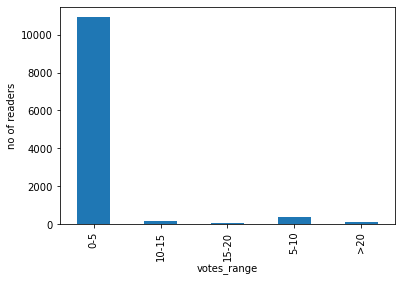

In [105]:
ax = review_b_9.plot.bar(rot = 90)
ax.set_ylabel("no of readers")